In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

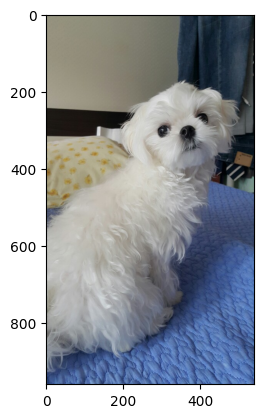

In [2]:
img1 = cv.imread('./../image/test.jpg')#, cv.COLOR_BGR2RGB)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
plt.imshow(img1)

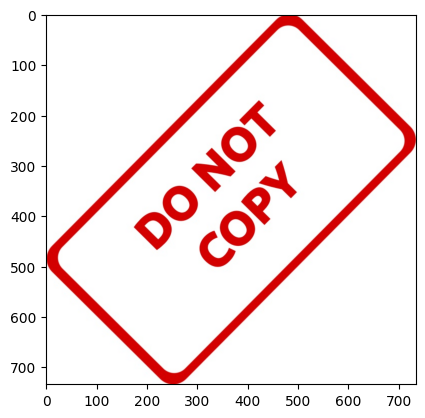

In [3]:
img2 = cv.imread('./../image/watermark_no_copy.jpg')#, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.imshow(img2)

In [4]:
blended = cv.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
plt.imshow(blended)

error: OpenCV(4.10.0) /io/opencv/modules/core/src/arithm.cpp:658: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [5]:
img2 = cv.resize(img2, (img1.shape[1], img1.shape[0]))
img1.shape, img2.shape

((960, 540, 3), (960, 540, 3))

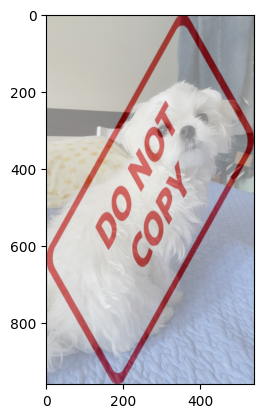

In [6]:
blended = cv.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)
plt.imshow(blended)

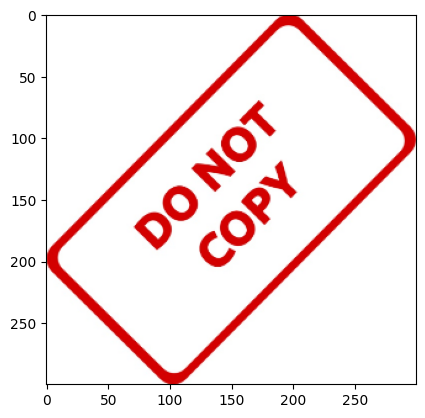

In [7]:
img2 = cv.resize(img2, (300, 300))
plt.imshow(img2)

In [8]:
limg = img1
simg = img2
x_offset = 0
y_offset = 0

In [9]:
x_end = x_offset + simg.shape[1]
y_end = y_offset + simg.shape[0]
limg[y_offset:y_end, x_offset:x_end] = simg

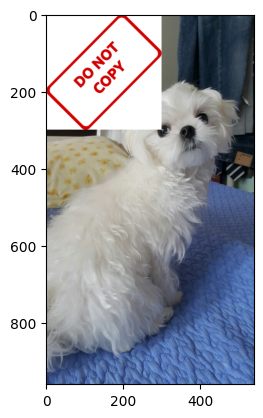

In [10]:
plt.imshow(limg)

In [11]:
img1 = cv.imread('./../image/test.jpg')#, cv.COLOR_BGR2RGB)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('./../image/watermark_no_copy.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img2 = cv.resize(img2, (300, 300))
img1.shape, img2.shape

((960, 540, 3), (300, 300, 3))

In [12]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
x_offset, y_offset

(240, 660)

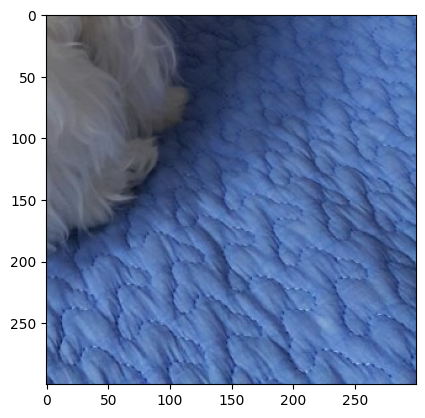

In [13]:
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]
plt.imshow(roi)

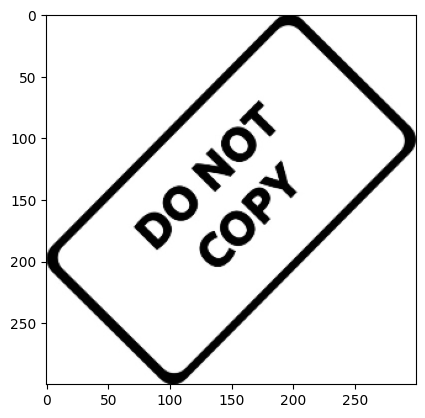

In [14]:
img2_gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
plt.imshow(img2_gray, cmap='gray')

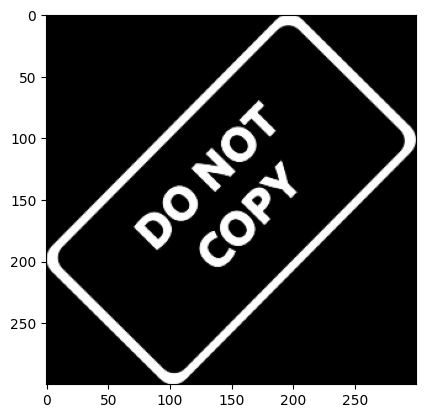

In [15]:
mask_inv = cv.bitwise_not(img2_gray)
plt.imshow(mask_inv, cmap='gray')

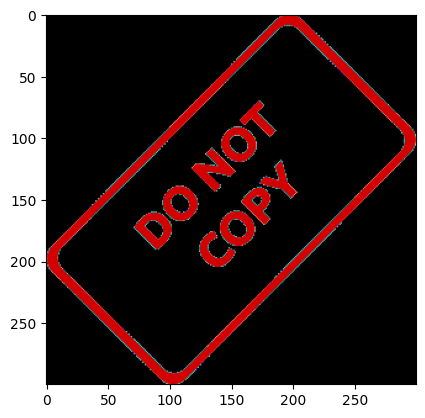

In [31]:
fg = cv.bitwise_or(img2, img2, mask=mask_inv)
fg[fg>230] = 0
plt.imshow(fg)

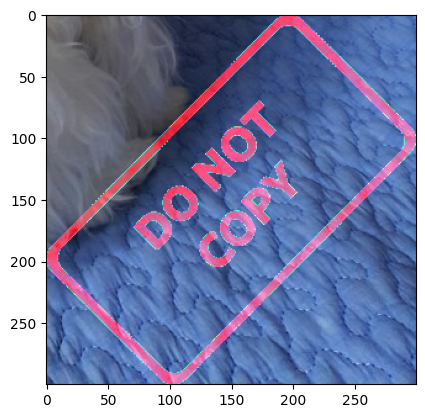

In [17]:
final_roi = cv.bitwise_or(roi, fg)
plt.imshow(final_roi)

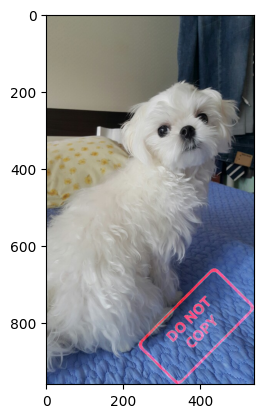

In [18]:
img1[y_offset:y_offset + img2.shape[0], x_offset:x_offset + img2.shape[1]] = final_roi
plt.imshow(img1)

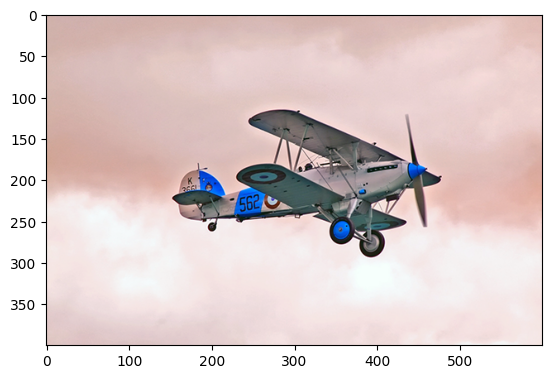

In [21]:
import os
path = './../image/'
src = cv.imread(os.path.join(path, 'airplane.bmp'), cv.IMREAD_COLOR)
plt.imshow(src)

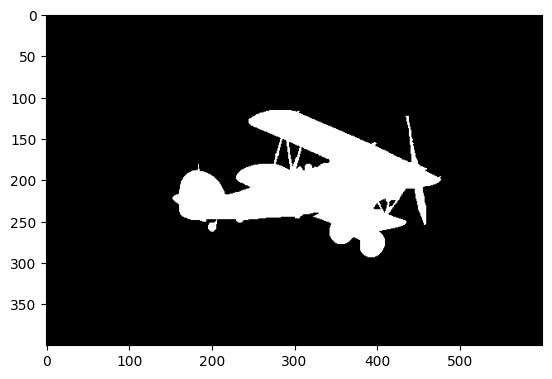

In [22]:
mask = cv.imread(os.path.join(path, 'mask_plane.bmp'), cv.IMREAD_GRAYSCALE)
plt.imshow(mask, cmap='gray')

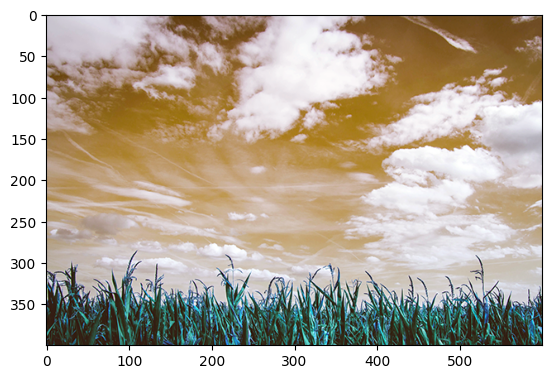

In [23]:
dst = cv.imread(os.path.join(path, 'field.bmp'), cv.IMREAD_COLOR)
plt.imshow(dst)

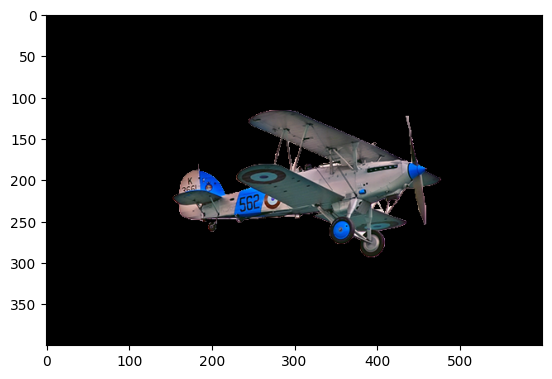

In [27]:
plt.imshow(cv.copyTo(src, mask))

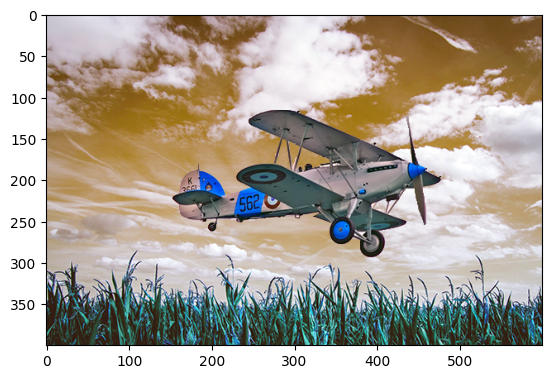

In [28]:
plt.imshow(cv.copyTo(src, mask, dst))